In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

import dateutil as dtl

from collections import Counter, defaultdict

In [2]:
pd.set_option('display.max_colwidth', -1)

sns.set(color_codes=True)
sns.set_palette("deep")
%matplotlib inline

In [3]:
df = pd.read_csv('./Final-Project/20190412_AM_Data.csv')

df['tweetTimeDate_new'] = df['tweetTimeDate'].apply(dtl.parser.parse, dayfirst=True)
df["tweetDate_new"] = pd.to_datetime(df['tweetDate_new'])

In [4]:
df.head(2)

,authorFollower,authorFriend,authorID,authorID_original,authorLang,authorLocation,authorPicture,authorScreen,authorScreen_original,tweetID,...,authorPicture_new,tweetMethod_new,tweetDate,tweetDate_new,tweetSentiment_cat,authorLocation_new,isRetweet,tweetLang,topicNumber,tweetTimeDate_new
0,197,579.0,5.642576e+08,NaN,en,NaN,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,darleneclarke5,NaN,0,...,Default,Web_Standard,Mon Mar 04 2019,2019-03-04,Very Negative,NaN,1,en,0.0,2019-03-04 23:59:47+00:00
1,940,225.0,3.109106e+09,NaN,en,top your momma,http://pbs.twimg.com/profile_images/1062099415421411333/EZCmOCeu_normal.jpg,BlueelvisEric,NaN,1,...,Personalized,Smartphone,Mon Mar 04 2019,2019-03-04,Negative,Not USA,1,en,4.0,2019-03-04 23:59:40+00:00


### Distribution plot for VADER sentiment score:
- Note that the histogram height shows a density rather than a count (see documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html)

Text(0.5, 1.0, 'Sentiment score distribution')

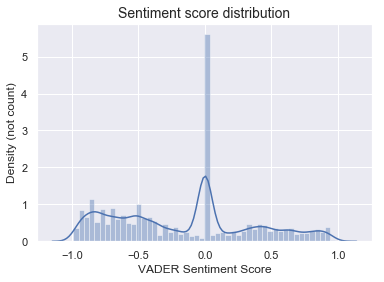

In [7]:
p1 = sns.distplot(df['tweetSentiment'])
p1.set_xlabel('VADER Sentiment Score')
p1.set_ylabel('Density (not count)')
p1.set_title('Sentiment score distribution', fontsize=14)

Text(0.5, 1.0, 'Sentiment score distribution by author location')

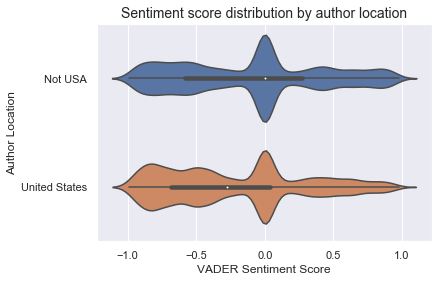

In [8]:
p2 = sns.violinplot(x=df['tweetSentiment'], y=df['authorLocation_new'])
p2.set_xlabel('VADER Sentiment Score')
p2.set_ylabel('Author Location')
p2.set_title('Sentiment score distribution by author location', fontsize=14)

### Grouping sentiment into categories:

In [9]:
df['tweetSentiment_cat'] = df['tweetSentiment_cat'].astype('category')

Text(0.5, 1.0, 'Sentiment group distribution')

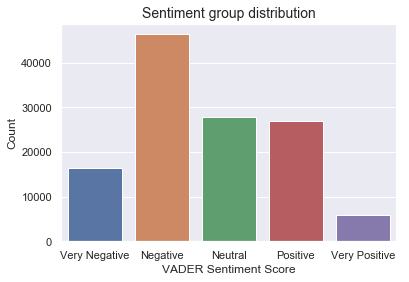

In [10]:
p3 = sns.countplot(df['tweetSentiment_cat'], order = ("Very Negative", "Negative", "Neutral", "Positive", "Very Positive"))
p3.set_xlabel('VADER Sentiment Score')
p3.set_ylabel('Count')
p3.set_title('Sentiment group distribution', fontsize=14)

Text(0.5, 1.0, 'Sentime group distrbution by author location')

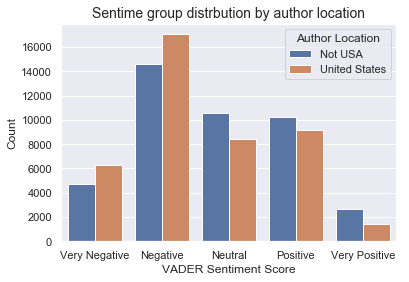

In [11]:
p4 = sns.countplot(x=df['tweetSentiment_cat'], hue=df['authorLocation_new'], order =("Very Negative", "Negative", "Neutral", "Positive", "Very Positive"))
p4.set_xlabel('VADER Sentiment Score')
p4.set_ylabel('Count')
p4.legend(title='Author Location', title_fontsize=12)
p4.set_title('Sentime group distrbution by author location', fontsize=14)

### Temporal analysis:

Text(0.5, 1.0, 'Tweeting Frequency by exact time')

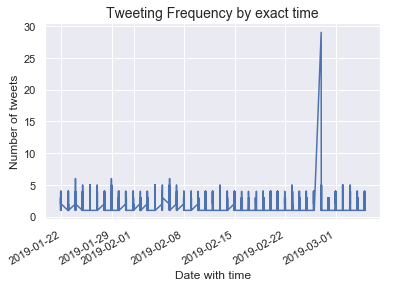

In [12]:
p5 = df["tweetTimeDate_new"].value_counts().plot()
p5.set_xlabel('Date with time')
p5.set_ylabel('Number of tweets')
p5.set_title('Tweeting Frequency by exact time', fontsize=14)

Text(0.5, 1.0, 'Tweeting Frequency by day')

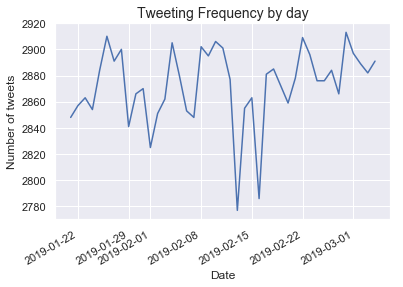

In [13]:
p6 = df['tweetDate_new'].value_counts().plot()
p6.set_xlabel('Date')
p6.set_ylabel('Number of tweets')
p6.set_title('Tweeting Frequency by day', fontsize=14)

### Aggregating sentiment score by day:

In [14]:
map_date_sentiment = defaultdict(int) # default value of an unseen key is 0

date_sent_tups = [tuple(x) for x in df[['tweetDate_new', 'tweetSentiment']].values]
for date, score in date_sent_tups:
    map_date_sentiment[date] += score
    
dates = list(map_date_sentiment.keys())
scores = list(map_date_sentiment.values())

In [15]:
sorted_tups = sorted(map_date_sentiment.items(), key=lambda kv: kv[1])

In [16]:
# Save it for later use:
### import pickle

### with open('./date_agg_sentiment.pickle', 'wb') as f:
###     pickle.dump(sorted_tups, f)

Text(0.5, 1.0, 'Sentiment Scores by day')

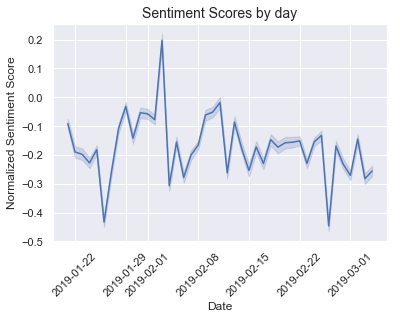

In [17]:
p7 = sns.lineplot(x=df['tweetDate_new'], y=df['tweetSentiment'])
p7.set_xticklabels(labels=p6.get_xticklabels(), rotation=45)
p7.set_xlabel('Date')
p7.set_ylabel('Normalized Sentiment Score')
p7.set_title('Sentiment Scores by day', fontsize=14)

Text(0.5, 1.0, 'Sentiment Scores by day for different author locations')

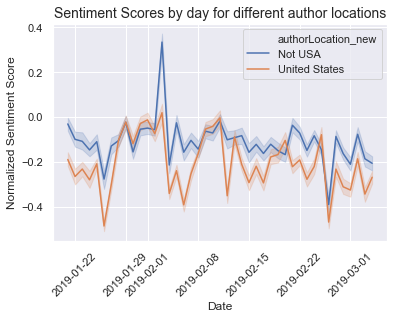

In [18]:
p8 = sns.lineplot(x=df['tweetDate_new'], y=df['tweetSentiment'], hue=df['authorLocation_new'])
p8.set_xticklabels(labels=p6.get_xticklabels(), rotation=45)
p8.set_xlabel('Date')
p8.set_ylabel('Normalized Sentiment Score')
p8.set_title('Sentiment Scores by day for different author locations', fontsize=14)

### Sentiment Scores for different LDA topics:

- Topic numbers correspond to:
     - [(0,
  u'0.016*"group" + 0.016*"get" + 0.015*"watch" + 0.014*"american" + 0.012*"new" + 0.011*"refugee" + 0.011*"crisis" + 0.011*"people" + 0.011*"right" + 0.010*"guess"'),
     - (1,
  u'0.029*"caravan" + 0.025*"know" + 0.025*"trump" + 0.016*"family" + 0.015*"u" + 0.015*"prevent" + 0.014*"implement" + 0.012*"vote" + 0.012*"need" + 0.011*"today"'),
     - (2,
  u'0.040*"europe" + 0.036*"pact" + 0.032*"hungary" + 0.032*"voice" + 0.031*"brussels" + 0.030*"v_of_europe" + 0.016*"illegal" + 0.016*"life" + 0.015*"police" + 0.013*"street"'),
     - (3,
  u'0.060*"child" + 0.019*"gang" + 0.016*"free" + 0.015*"part" + 0.014*"say" + 0.014*"government" + 0.013*"u.s." + 0.013*"youth" + 0.013*"worker" + 0.013*"salvadoran"'),
     - (4,
  u'0.056*"border" + 0.042*"law" + 0.031*"cross" + 0.028*"arizona" + 0.028*"via" + 0.028*"bus" + 0.027*"section" + 0.027*"unsecured" + 0.027*"unloads" + 0.021*"stop"')]

In [19]:
# We only have topics for English language tweets, so filtering dataframe:
eng_df = df.loc[df['tweetLang'].str.startswith('en')]
print(eng_df.shape)
eng_df.head()

(111785, 27)


,authorFollower,authorFriend,authorID,authorID_original,authorLang,authorLocation,authorPicture,authorScreen,authorScreen_original,tweetID,...,authorPicture_new,tweetMethod_new,tweetDate,tweetDate_new,tweetSentiment_cat,authorLocation_new,isRetweet,tweetLang,topicNumber,tweetTimeDate_new
0,197,579.0,5.642576e+08,NaN,en,NaN,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,darleneclarke5,NaN,0,...,Default,Web_Standard,Mon Mar 04 2019,2019-03-04,Very Negative,NaN,1,en,0.0,2019-03-04 23:59:47+00:00
1,940,225.0,3.109106e+09,NaN,en,top your momma,http://pbs.twimg.com/profile_images/1062099415421411333/EZCmOCeu_normal.jpg,BlueelvisEric,NaN,1,...,Personalized,Smartphone,Mon Mar 04 2019,2019-03-04,Negative,Not USA,1,en,4.0,2019-03-04 23:59:40+00:00
2,103,275.0,1.083790e+18,NaN,en,NaN,http://pbs.twimg.com/profile_images/1083792878655045632/zQMarxaz_normal.jpg,Potus16Abe,NaN,2,...,Personalized,Web_Lite,Mon Mar 04 2019,2019-03-04,Positive,NaN,1,en,1.0,2019-03-04 23:59:38+00:00
3,718,869.0,7.967720e+17,NaN,en,NaN,http://pbs.twimg.com/profile_images/1061628259761352707/45jSYb3T_normal.jpg,soozbo,NaN,3,...,Personalized,Smartphone,Mon Mar 04 2019,2019-03-04,Negative,NaN,1,en,0.0,2019-03-04 23:59:34+00:00
4,666,481.0,1.056307e+08,NaN,en,Netherlands,http://pbs.twimg.com/profile_images/378800000757810411/851d42a8b7e7efd00eded4d6efff5587_normal.jpeg,jp_dutch,NaN,4,...,Personalized,Smartphone,Mon Mar 04 2019,2019-03-04,Very Negative,Not USA,1,en,1.0,2019-03-04 23:59:32+00:00


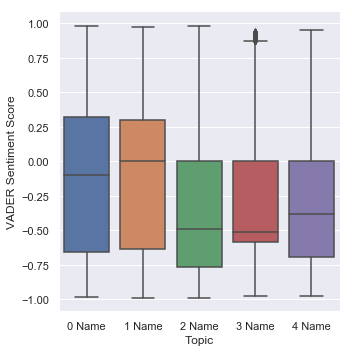

In [20]:
p9 = sns.catplot(x='topicNumber', y='tweetSentiment', kind='box', data=eng_df)
p9.set_axis_labels('Topic', 'VADER Sentiment Score')
p9.set_xticklabels(["0 Name", "1 Name", "2 Name", "3 Name", "4 Name"])

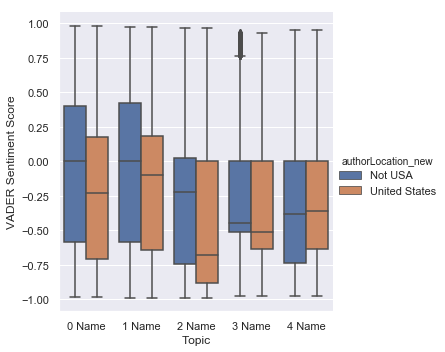

In [21]:
p10 = sns.catplot(x='topicNumber', y='tweetSentiment', kind='box', data=eng_df, hue='authorLocation_new')
p10.set_axis_labels('Topic', 'VADER Sentiment Score')
p10.set_xticklabels(["0 Name", "1 Name", "2 Name", "3 Name", "4 Name"])

## Word Cloud:
- Function that creates a word cloud given a list of dates:

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Build stopword list:

# list of built-in stopwords for the top languages
languages = ['english', 'french', 'german', 'spanish']

STOPWORDS = []
for lang in languages:
    STOPWORDS.extend(stopwords.words(lang))

# Stopwords that I came across: amp represents '&' and "n't" is not
custom_stopwords = ["amp", "n't", "rt", "http", "https", "migration", "migrant"]

STOPWORDS.extend(custom_stopwords)
print("4 languages + custom stopwords, we have a total of {} words.".format(len(STOPWORDS)))

def create_word_cloud(dates):
    """
    Creates a word cloud from the tweets for the given list of dates. Filters stopwords.
    
    Parameters
    ----------
    dates: list of Timestamp objects (eg: [Timestamp('2019-03-03 00:00:00'), ..])
    
    Returns
    -------
    None (Plots a word cloud)
    """
    df = pd.read_csv('./Final-Project/20190406_AM_Data.csv')

    df["tweetDate_new"] = pd.to_datetime(df['tweetDate_new'])
    df = df.loc[df['tweetDate_new'].isin(sample_dates)]
    
    tweets = df['tweetText'].tolist()
    
    all_words = []
    for tweet in tweets:
        words = word_tokenize(tweet)
        for w in words:
            word = w.lower() # change to lowercase
            if word[0].isalpha() and word not in STOPWORDS: # skip non-words and skip stopwords
                all_words.append(word)
    
    wordfreq = Counter(all_words)
    # draw a Word Cloud with word frequencies
    wordcloud = WordCloud(width=900,
                          height=500,
                          max_words=100,
                          max_font_size=100,
                          relative_scaling=0.5,
                          colormap='Blues',
                          normalize_plurals=True).generate_from_frequencies(wordfreq)
    plt.figure(figsize=(17,14))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

4 languages + custom stopwords, we have a total of 885 words.


### Try it:
- Note: I added 'migrant' and 'migration' in the stopwords list (because those are always present).

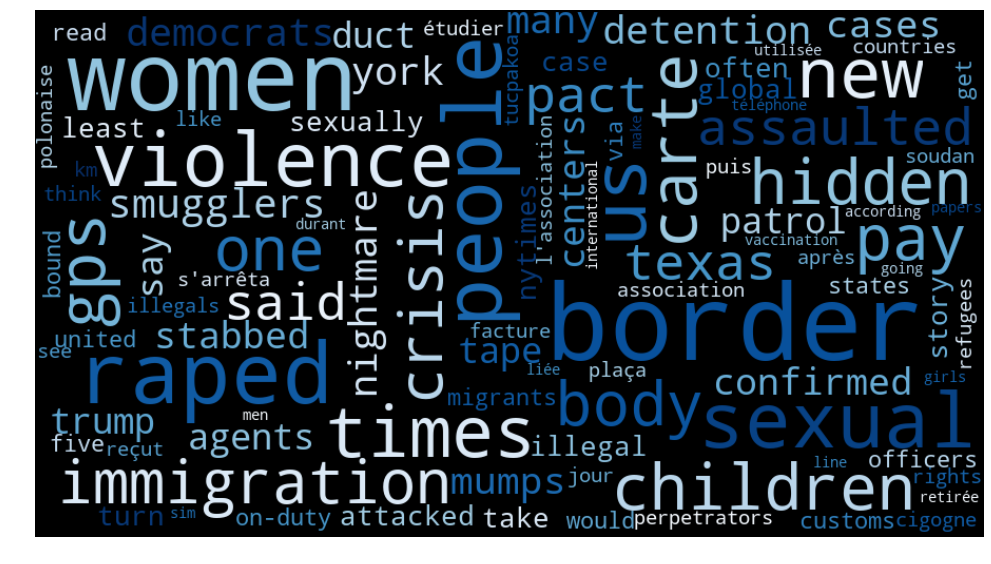

In [24]:
from pandas import Timestamp
sample_dates = [Timestamp('2019-03-04 00:00:00'), Timestamp('2019-03-03 00:00:00')]

create_word_cloud(sample_dates)

# fin.